# 讨论如下问题求法


## 求三维空间三角形面积

###  需求规则
1. 已知三维空间的三个点的坐标。
2. 利用欧式距离公式求两点间的距离。三维空间两点$A: (x_1,y_1,z_1), B (x_2,y_2,z_2)$
3. 利用海伦公式求任意三角形的面积。 设置 $a,b,c$为任意三角形的边长，其半周长$s=(a+b+c)/2$,则海伦公式为
$$ area= \sqrt{s\times(s-a)\times(s-b)\times(s-c)} $$

In [3]:
import numpy as np

# x1, x2, x3: the coordinate of the vertexes in 3-d 
def triangle_area_3d(x1, x2, x3):

    # use numpy.linalg.norm to caculate the distance of each side, since it works in higher dimension (more than 2 dimension)
    a = np.linalg.norm(x1 - x2)
    b = np.linalg.norm(x1 - x3)
    c = np.linalg.norm(x2 - x3)

    # caculate the half of its perimeter
    s = (a + b + c) / 2

    # use the Heron's formula to caculate its area
    area = np.sqrt(s * (s - a) * (s - b) * (s-  c))

    return area

# test the function
if __name__ == "__main__":

    x1 = np.array([0, 0, 0])
    x2 = np.array([0, 0, 1])
    x3 = np.array([0, 1, 0])

    area = triangle_area_3d(x1, x2, x3)

    print("The area of triangle is :", area)

The area of triangle is : 0.49999999999999983


# 图像处理

**需求规则**

1. 读取JPG数字图片到二维数组
2. 过滤每个像素值，当像素值小于$T$值时，像素值设定为0；当像素值大于$T$值时，像素值设定为255.

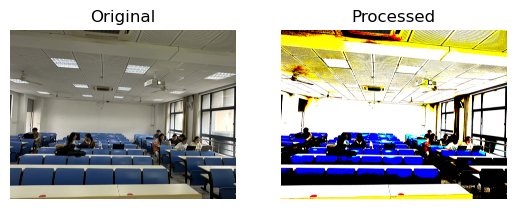

In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 

# T: the standard value of a pixel
# path : file path of the image
def image_process(T, path):

    # read images, the image needs to be a RGB image; copy it in order to avoid r-w permession control problem
    img = mpimg.imread(path)
    img = img.copy()
    
    # when the value of a pixel is less than T, set it 0; otherwise, set it 255
    img[:, : ,0] = np.where(img[:, : ,0] <= T, 0, 255)
    img[:, : ,1] = np.where(img[:, :, 1] <= T, 0, 255)
    img[:, : ,2] = np.where(img[:, :, 2] <= T, 0, 255)
    
    return img
    
# test the function
if __name__ == "__main__":

    path = 'test.jpg'
    T = 100

    # load the image
    img = mpimg.imread(path)

    # use the function to process image
    pr_img = image_process(T, path)

    # output images
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(img)
    a.set_title('Original')
    plt.axis("off")
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(pr_img)
    a.set_title('Processed')
    plt.axis("off")

# 最小-最大标准化

**需求规则**

1. 获取一组数据$X$，找出最大值、最小值
2. 利用如下公式进行归一化处理
$$x'=\frac{x-X_{min}}{X_{max}-X_{min}},$$ 
$X_{min}$和$X_{max}$分别是$X$的最小值和最大值

3. 输出处理结果

In [40]:
import numpy as np

# x: the data (the formulte is array)
def stdlize(x):

    # get the maximun and minimum
    maximum = np.max(x)
    minimum = np.min(x)

    # caculate the standardlization value
    result = (x - minimum) / (maximum - minimum)

    return result 

# test the function
if __name__ == "__main__":
     
     data = np.random.randint(1, 100, size=30)
     result = stdlize(data)

     print("The original data: ", data)
     print("\n")
     print("The standardlized data: ", result)

The original data:  [ 9 34 87 84  4 40  5 17 66 70 36 74 63 75 85 35 16 27 50 95 40 74 64 14
 85 68 27 10 58 90]


The standardlized data:  [0.05494505 0.32967033 0.91208791 0.87912088 0.         0.3956044
 0.01098901 0.14285714 0.68131868 0.72527473 0.35164835 0.76923077
 0.64835165 0.78021978 0.89010989 0.34065934 0.13186813 0.25274725
 0.50549451 1.         0.3956044  0.76923077 0.65934066 0.10989011
 0.89010989 0.7032967  0.25274725 0.06593407 0.59340659 0.94505495]
